In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import os
import random 
import numpy as np
import cv2


datadir='C:/Users/djamel eddine/Desktop/py/handgest1'
categories=["digit1","digit1p","digit2","digit2p","digit3","digit3p","digit4","digit4p","digit5","pince1"]


img_size=224
training_data=[]
def creat_train_data():
    for c in categories:
        try:  
            path=os.path.join(datadir,c)
            class_num=categories.index(c)
            for img in os.listdir(path): 
                img_array=cv2.imread(os.path.join(path,img))   
                img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                #_,img_array=cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU+cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
                new_array=cv2.resize(img_array,(img_size,img_size))  
                training_data.append([new_array,class_num])
                #plt.imshow(img_array)
        except Exception as e:
         pass
    
creat_train_data() 

random.shuffle(training_data)

x1,y1=[],[]

for features,label in training_data:
    x1.append(features)
    y1.append(label)
    
x1=np.array(x1).reshape(-1,img_size,img_size,1)  
y1=np.asarray(y1)    
#x1=x1.astype('float64')
x1=x1/255.




In [ ]:
len(x1)

In [10]:
import pickle
pickle_out=open("xbnw.pickle","wb")
pickle.dump(x1,pickle_out)
pickle_out.close()
pickle_out=open("ybnw.pickle","wb")
pickle.dump(y1,pickle_out)
pickle_out.close()


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle

name="{}-layers1-{}-nodes1-{}-dens1-{}".format(3,13,2,int(time.time()))    
tb=TensorBoard(log_dir='logsbnw\{}'.format(name)) 
img_size=224

#x1=pickle.load(open("xbnw.pickle","rb"))
#y1=pickle.load(open("ybnw.pickle","rb"))

model1=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(128,(3,3),activation='linear',input_shape=(img_size,img_size,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='linear'),
    tf.keras.layers.Dense(10,activation='softmax')
    
])
model1.summary()

model1.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model1.fit(x1,y1,batch_size=5,epochs=5,validation_split=0.3,callbacks=[tb])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 128)     1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [16]:
model1.save('mymodel10digit.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mymodel10digit.model\assets


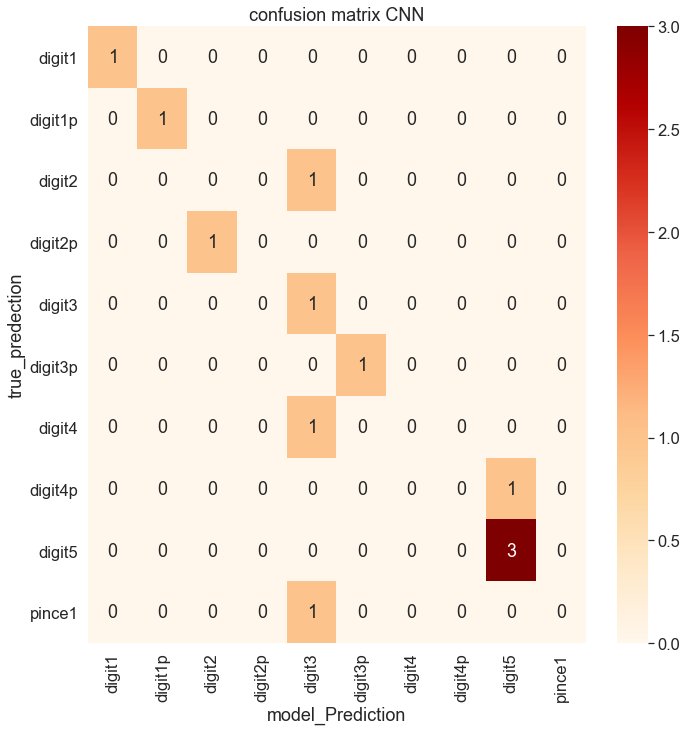

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix


model1=tf.keras.models.load_model('mymodel10digit.model')
#direc="C:/Users/djamel eddine/Desktop/py/testing1"
direc="C:/Users/djamel eddine/Desktop/py-project/class/Nouveau dossier"
img_size=224
test_image,test_label,prediction_array=[],[],[]
categories=["digit1","digit1p","digit2","digit2p","digit3","digit3p","digit4","digit4p","digit5","pince1"]
test_label=[0,1,2,3,4,5,6,7,8,8,8,9]
                

for img in os.listdir(direc): 
        img_array=cv2.imread(os.path.join(direc,img)) 
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        #img_array =cv2.rotate(img_array,cv2.ROTATE_180)
        #_,img_array=cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU+cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
        new_array=cv2.resize(img_array,(img_size,img_size))
        #test_image.append(new_array)
        new_array= new_array.reshape(-1,img_size,img_size,1)
        prediction=model1.predict([new_array])
        prediction_array.append(np.argmax(prediction))
        
        
     





con_mat=tf.math.confusion_matrix(test_label,prediction_array)
figure = plt.figure(figsize=(10, 10)) 
xticklabels,yticklabels=[],[]
for c in categories :
    xticklabels.append('{}'.format(c))
    yticklabels.append('{}'.format(c))
    
sn.set(font_scale=1.5)
hm=sn.heatmap(con_mat,annot=True,xticklabels=xticklabels, yticklabels=yticklabels,cmap="OrRd")
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.title("confusion matrix CNN")
plt.xlabel('model_Prediction')
plt.ylabel('true_predection')
plt.show()              

